# Decision Trees & Random Forests

Have a look at [Chapter 5.08 of PDSH on Support Vector Machines](https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html)[![Cover image of PDSH](images/PDSH-cover-small.png)](https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html)

I think decision trees should be familiar to many of you in the form of identification keys: a series of questions to narrow in on a classification. Each question typically has two answers, each leading to another question, narrowing in on a classification. Even the image from PDSH is reminiscent of a key, takign the task of classifying an animal found on a hike:

![Decision tree image from Python Data Science Handbook](images/05.08-decision-tree.png)

In efficient decision trees, each question with halve the number of possibilities and decision trees can be an efficient method for classification.



In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import plotnine as pn
import matplotlib.pyplot as plt
import graphviz

from helpers_05_08 import visualize_tree

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn import metrics


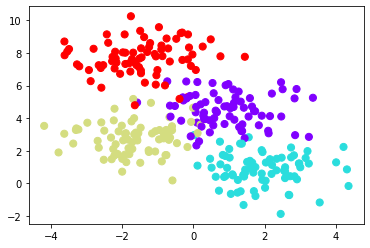

In [2]:
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

# If you want to do in plotnine:
#df=pd.DataFrame({'x':X[:,0], 'y':X[:,1], 'cat':y } )
#pn.ggplot(df, pn.aes(x='x', y='y')) + pn.geom_point(pn.aes(color='factor(df.cat)'))

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

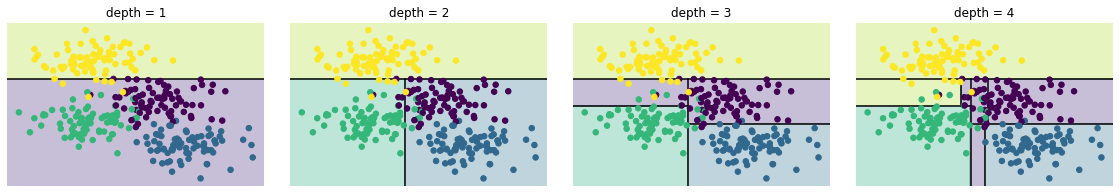

In [3]:
        
fig, ax = plt.subplots(1, 4, figsize=(16, 3))
fig.subplots_adjust(left=0.02, right=0.98, wspace=0.1)

for axi, depth in zip(ax, range(1, 5)):
    model =DecisionTreeClassifier(max_depth=depth)
    visualize_tree(model, X, y, ax=axi)
    axi.set_title('depth = {0}'.format(depth))

In [4]:
dot_data = export_graphviz(model) 
graph = graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [7]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None) 

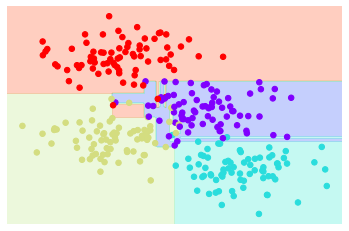

In [8]:
visualize_classifier(DecisionTreeClassifier(), X, y)

In [18]:
# helpers_05_08 is found in the online appendix

helpers_05_08.plot_tree_interactive(X, y);

interactive(children=(Dropdown(description='depth', index=1, options=(1, 5), value=5), Output()), _dom_classes…

As the text notes, one of the issues with decision trees is overfitting.

We've looked at overfitting before, and one way to see this is to compare models trained on different portions of the data. We could take random splits of the data, but the text takes a simpler approach, taking every other element of the dataset starting at 0, for one model and starting at 1 for the other model and then comparing the plots of each.

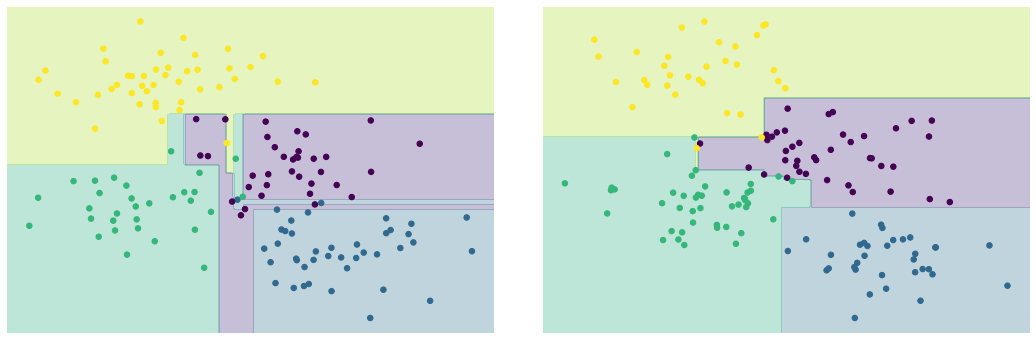

In [10]:
model = DecisionTreeClassifier()

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
visualize_tree(model, X[::2], y[::2], boundaries=False, ax=ax[0])
visualize_tree(model, X[1::2], y[1::2], boundaries=False, ax=ax[1])


## Ensembles of Estimators: Random Forests

The interesting thing here is that if we take a bunch of overfit models and combine them, we can actually get a reasonable estimate. This is referred to as an **ensemble method** called **bagging**. From PDSH:

> Bagging makes use of an ensemble (a grab bag, perhaps) of parallel estimators, each of which over-fits the data, and averages the results to find a better classification. An ensemble of randomized decision trees is known as a *random forest*.

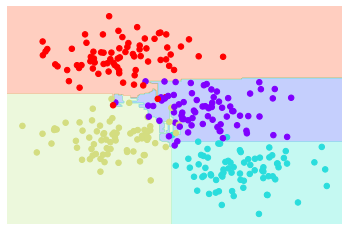

In [12]:


tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

Again  from PDSH:
> In this example, we have randomized the data by fitting each estimator with a random subset of 80% of the training points. In practice, decision trees are more effectively randomized by injecting some stochasticity in how the splits are chosen: this way all the data contributes to the fit each time, but the results of the fit still have the desired randomness. For example, when determining which feature to split on, the randomized tree might select from among the top several features. You can read more technical details about these randomization strategies in the [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/ensemble.html#forest) and references within.

Take note of the bias variance tradeoff discussion in the [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/ensemble.html#forest)--sound familiar??

The `RandomForestClassifier` selects samples from the training set with replacement (bootstrapping). Either all or a random subset of features are used for each split.

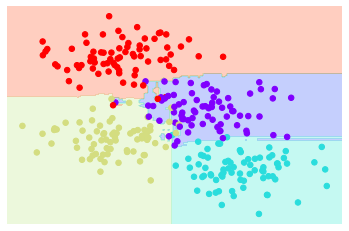

In [13]:
model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);

## Random Forest Regression

I'm not going to cover, this, but check out the text if you want information on how Random Forests can also be used for regression problems.



## Example: Random Forest for Classifying Digits

We haven't looked at this dataset yet, but the text uses it a lot. This is a set of 1,797 scans of hand written digits, each digit is a 8X8 pixel grey-scale image.

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


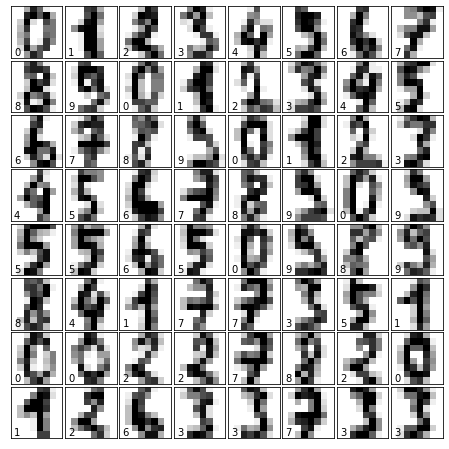

In [16]:

digits = load_digits()
print(digits.keys())

# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [20]:
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [22]:
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      0.96      0.98        45
           2       0.95      1.00      0.98        42
           3       0.98      0.96      0.97        46
           4       0.97      1.00      0.99        37
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.96      0.98      0.97        46

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



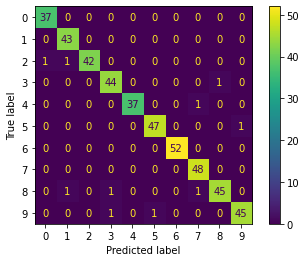

In [27]:
from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(ytest, ypred)
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels=digits.target_names).plot()